In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff




from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score

In [3]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz
%matplotlib inline

     |████████████████████████████████| 266kB 8.5MB/s 
     |████████████████████████████████| 3.1MB 15.5MB/s 
     |████████████████████████████████| 604kB 44.5MB/s 
     |████████████████████████████████| 71kB 8.7MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 112kB 48.3MB/s 
     |████████████████████████████████| 296kB 49.3MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=7d9d5aafceda5d1278dabeed64ffe544b150ed0242ca7e983abeb2c0bb5e912e
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5
  Found existing installation: pandas-profiling 1.4.1
    Uninstal

Load The dataset

In [4]:
data_file="https://raw.githubusercontent.com/NaseemQurabar/GermanDataset/main/german_credit.csv"

credit_df= pd.read_csv(data_file)




Find information of dataset

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

find the Size of dataset

In [6]:
credit_df.shape

(1000, 21)

show the first few rows of dataset

In [7]:
credit_df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


Look at loaded data and data types

In [8]:
for col in credit_df.columns:
  if credit_df[col].dtype=='object':
    #making sure data is not read as bytes but as string values from a file
    credit_df[col] = credit_df[col].str.decode('utf-8')
#Look at loaded data and data types
print(credit_df.dtypes)

Creditability                        int64
Account Balance                      int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Value Savings/Stocks                 int64
Length of current employment         int64
Instalment per cent                  int64
Sex & Marital Status                 int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age (years)                          int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object


In [9]:
np.transpose(credit_df.head())

,0,1,2,3,4
Creditability,1,1,1,1,1
Account Balance,1,1,2,1,1
Duration of Credit (month),18,9,12,12,12
Payment Status of Previous Credit,4,4,2,4,4
Purpose,2,0,9,0,0
Credit Amount,1049,2799,841,2122,2171
Value Savings/Stocks,1,1,2,1,1
Length of current employment,2,3,4,3,3
Instalment per cent,4,2,2,3,4
Sex & Marital Status,2,3,2,3,3


Checking for Null Values

In [10]:
credit_df.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

find out the summary mean median sd of dataset

In [11]:
np.transpose(credit_df.describe())

,count,mean,std,min,25%,50%,75%,max
Creditability,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Account Balance,1000.0,2.577,1.257638,1.0,1.0,2.0,4.00,4.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Purpose,1000.0,2.828,2.744439,0.0,1.0,2.0,3.00,10.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Value Savings/Stocks,1000.0,2.105,1.580023,1.0,1.0,1.0,3.00,5.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Sex & Marital Status,1000.0,2.682,0.708080,1.0,2.0,3.0,3.00,4.0


plot the Histogram of variables

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


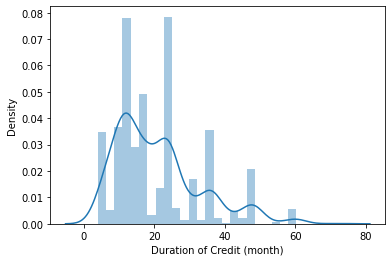

In [12]:
sns.distplot(credit_df['Duration of Credit (month)'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


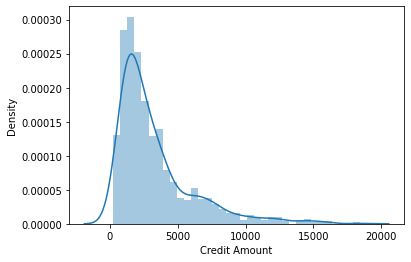

In [13]:
sns.distplot(credit_df['Credit Amount'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


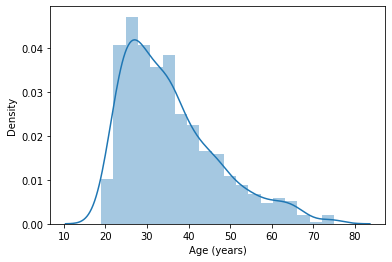

In [14]:
sns.distplot(credit_df['Age (years)'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


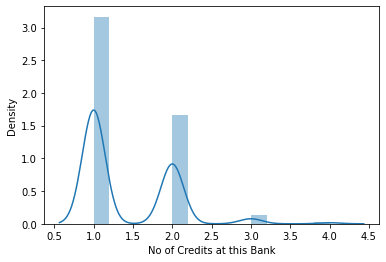

In [15]:
sns.distplot(credit_df['No of Credits at this Bank'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


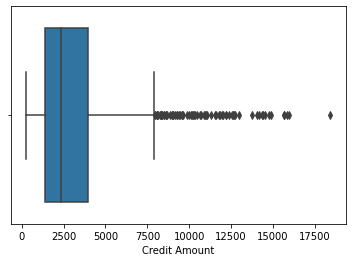

In [16]:
sns.boxplot(credit_df['Credit Amount'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


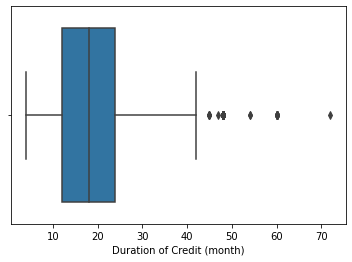

In [17]:
sns.boxplot(credit_df['Duration of Credit (month)'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


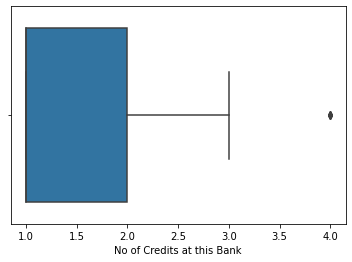

In [19]:
sns.boxplot(credit_df['No of Credits at this Bank'])

finding out the corelation between different vairables for feature selection.

In [18]:
credit_df.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
Creditability,1.0,0.3508,-0.2149,0.2288,-0.01798,-0.1547,0.1789,0.116,-0.0724,0.08818,0.02514,-0.002967,-0.1426,0.09127,0.1098,0.01812,0.04573,-0.03274,0.003015,0.03647,0.08208
Account Balance,0.3508,1.0,-0.07201,0.1922,0.02878,-0.0427,0.2229,0.1063,-0.00528,0.04326,-0.1277,-0.04223,-0.03226,0.05863,0.06827,0.02334,0.07601,0.04066,-0.01415,0.0663,-0.03519
Duration of Credit (month),-0.2149,-0.07201,1.0,-0.07719,0.1475,0.625,0.04766,0.05738,0.07475,0.01479,-0.02449,0.03407,0.304,-0.03755,-0.06288,0.1531,-0.01128,0.2109,-0.02383,0.1647,-0.1347
Payment Status of Previous Credit,0.2288,0.1922,-0.07719,1.0,-0.09034,-0.05991,0.03906,0.1382,0.04437,0.04217,-0.04068,0.0632,-0.05378,0.1463,0.16,0.06143,0.4371,0.01035,0.01155,0.05237,0.02855
Purpose,-0.01798,0.02878,0.1475,-0.09034,1.0,0.06848,-0.01868,0.01601,0.04837,0.0001566,-0.01761,-0.03822,0.01097,-0.0008924,-0.1002,0.01349,0.05494,0.008085,-0.03258,0.07837,-0.1132
Credit Amount,-0.1547,-0.0427,0.625,-0.05991,0.06848,1.0,0.06463,-0.008376,-0.2713,-0.01609,-0.02783,0.02892,0.3116,0.03227,-0.06939,0.133,0.02079,0.2854,0.01714,0.277,-0.03066
Value Savings/Stocks,0.1789,0.2229,0.04766,0.03906,-0.01868,0.06463,1.0,0.1209,0.02199,0.01735,-0.1051,0.09142,0.01895,0.08343,0.001908,0.006644,-0.02164,0.01171,0.02751,0.08721,0.01045
Length of current employment,0.116,0.1063,0.05738,0.1382,0.01601,-0.008376,0.1209,1.0,0.1262,0.1113,-0.008116,0.2451,0.08719,0.2591,-0.007279,0.1151,0.1258,0.1012,0.09719,0.06052,-0.02285
Instalment per cent,-0.0724,-0.00528,0.07475,0.04437,0.04837,-0.2713,0.02199,0.1262,1.0,0.1193,-0.0114,0.0493,0.05339,0.05727,0.007894,0.09123,0.02167,0.09776,-0.07121,0.01441,-0.09476
Sex & Marital Status,0.08818,0.04326,0.01479,0.04217,0.0001566,-0.01609,0.01735,0.1113,0.1193,1.0,0.05063,-0.02727,-0.00694,0.00515,-0.02675,0.09893,0.06467,-0.01196,0.1222,0.02727,0.0731


For feature selection setting the Threshold=0.1 and looking for strong correlation among all variables

In [19]:
cor=credit_df.corr()
threshold = 0.1
a=abs(cor['Creditability'])
result=a[a > 0.1]
result

Creditability                        1.000000
Account Balance                      0.350847
Duration of Credit (month)           0.214927
Payment Status of Previous Credit    0.228785
Credit Amount                        0.154740
Value Savings/Stocks                 0.178943
Length of current employment         0.116002
Most valuable available asset        0.142612
Concurrent Credits                   0.109844
Name: Creditability, dtype: float64

copying dataset

In [20]:
credit_df_fs = credit_df

drop all other variable which is not strongly related with class variable

In [21]:
credit_df.drop(["Purpose","Sex & Marital Status","Instalment per cent" \
          ,"Guarantors","Age (years)","Duration in Current address","Type of apartment","No of Credits at this Bank","Occupation", \
          "No of dependents","Telephone","Foreign Worker"], axis=1, inplace=True)

In [73]:
credit_df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Most valuable available asset,Concurrent Credits
0,1,1,18,4,1049,1,2,2,3
1,1,1,9,4,2799,1,3,1,3
2,1,2,12,2,841,2,4,1,3
3,1,1,12,4,2122,1,3,1,3
4,1,1,12,4,2171,1,3,2,1


Spliting the Data Into Training and Test with Test Size = 30%

In [23]:
class_col_name='Creditability' 
feature_names=credit_df.columns[credit_df.columns != class_col_name ]

X_train, X_test, y_train, y_test = train_test_split(credit_df.loc[:, feature_names], credit_df[class_col_name], test_size=0.3,random_state=1)

In [22]:
from sklearn.model_selection import train_test_split

class_col_name='Creditability' 
feature_names=credit_df.columns[credit_df.columns != class_col_name ]

X_train, X_test, y_train, y_test = train_test_split(credit_df.loc[:, feature_names], credit_df[class_col_name], test_size=0.5,random_state=1) 

In [23]:
print('Training Dataset', X_train.shape, y_train.shape)
print('Test Dataset', X_test.shape, y_test.shape)

Training Dataset (500, 8) (500,)
Test Dataset (500, 8) (500,)


Identify Outliers in the Training Dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


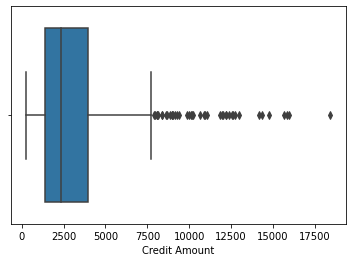

In [24]:
sns.boxplot(X_train['Credit Amount'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


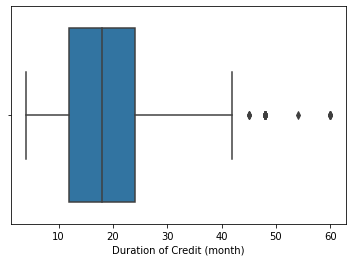

In [25]:
sns.boxplot(X_train['Duration of Credit (month)'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


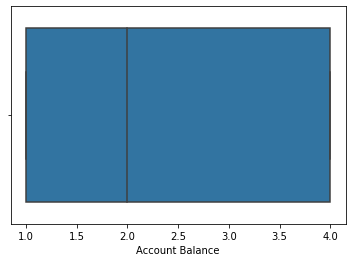

In [76]:
sns.boxplot(X_train['Account Balance'])

Removing the outliers from tranning dataset

In [26]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

mask = yhat != -1
X_train = X_train[mask] 
y_train = y_train[mask]
print(X_train.shape, y_train.shape)

(488, 8) (488,)


In [27]:
X_train.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Credit Amount,Value Savings/Stocks,Length of current employment,Most valuable available asset,Concurrent Credits
789,2,24,4,4736,1,2,3,1
179,4,48,3,12749,3,4,3,3
27,2,9,4,1154,1,5,1,3
33,4,24,2,1376,3,4,3,3
334,4,24,3,717,5,5,3,3


drawing boxlot after removing outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


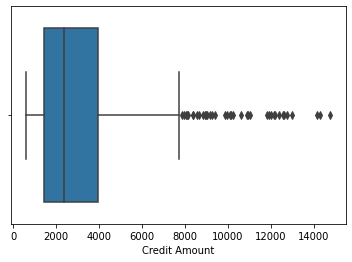

In [28]:
sns.boxplot(X_train['Credit Amount'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


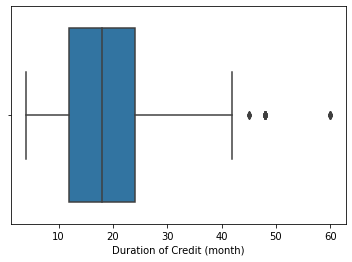

In [29]:
sns.boxplot(X_train['Duration of Credit (month)'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


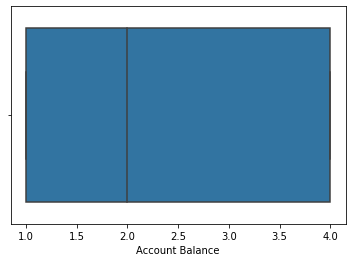

In [30]:
sns.boxplot(X_train['Account Balance'])

classification model-1 Decision Tree

In [31]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [32]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_depth : int, default=None
 |      The maximum depth of the tree. If None, then nodes are expanded until
 |      all leaves are pure or until all leaves contain less than
 |      min_samples_split samples.
 |  
 |  min_samples_split : int or float, default=2
 |      The minimum 

In [33]:
import graphviz

#Get unique class values to display on the tree
class_values=credit_df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph

class Names [1 0]


TypeError: ignored

to compute Accuracy of model

In [34]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.724


find out confusion matrix and and print the results

In [35]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[ 44 105]
 [ 33 318]]
TP:  318 , FP:  105 , TN:  44 , FN: 33


In [36]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.30      0.39       149
           1       0.75      0.91      0.82       351

    accuracy                           0.72       500
   macro avg       0.66      0.60      0.61       500
weighted avg       0.70      0.72      0.69       500



Model-2 Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [38]:
print ("Total Columns (including class)",len(credit_df.columns))

Total Columns (including class) 9


In [39]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  8
Classes  [0 1]
Number of records for classes  [149. 339.]
Log prior probability for classes  [-1.1863691 -0.3643153]
Log conditional probability for each feature given a class
 [[-7.60166677 -5.07086511 -7.46985507 -0.00992817 -7.72981259 -7.15249723
  -7.34806401 -7.3139847 ]
 [-6.95618489 -5.08825179 -7.04210157 -0.01149661 -7.22136436 -6.80375686
  -7.24252917 -7.03664602]]


In [40]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       149
           1       0.76      0.79      0.77       351

    accuracy                           0.68       500
   macro avg       0.61      0.60      0.60       500
weighted avg       0.67      0.68      0.67       500



In [94]:
y_pred = nb.predict(X_test)

acc = accuracy_score(y_test,y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.647
